In [2]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam, SGD

from keras.applications.resnet50 import preprocess_input

from keras.callbacks import ReduceLROnPlateau

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

from matplotlib import pyplot as plt

import numpy as np

import pandas as pd

import os

Using TensorFlow backend.


In [3]:
import types
import matplotlib
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
            try:
                yield val.__version__
            except:
                pass
list(imports())

['builtins',
 'builtins',
 'tensorflow',
 '1.13.1',
 'keras',
 '2.2.4',
 'matplotlib.pyplot',
 'numpy',
 '1.16.5',
 'pandas',
 '0.25.1',
 'os',
 'types',
 'matplotlib',
 '3.1.1']

In [4]:
tf.logging.set_verbosity(tf.logging.ERROR)

## Gobal parameters

In [5]:
# Fixed for our Hot Dog & Pizza classes
NUM_CLASSES = 2

# Class names
HOT_DOG_CLASS_NAME = "hot_dog"
PIZZA_CLASS_NAME = "pizza"

# Classification type
CLASSIFICATION_TYPE = 'binary'

# Fixed for Hot Dog & Pizza color images
CHANNELS = 3

# AlexNet specific input image size
IMAGE_RESIZE = 227

# Padding strategy to keep the same image size
SAME_PADDING = 'same'

# Padding strategy with right and bottom crop
VALID_PADDING = 'valid'

# Pooling strategy
RESNET50_POOLING_AVERAGE = 'avg'

# Activation functions
CONVOLUTIONAL_LAYER_ACTIVATION = 'relu'
DENSE_LAYER_ACTIVATION = 'sigmoid'

# Used to evaluate the error
OBJECTIVE_FUNCTION = 'binary_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 40
EARLY_STOP_PATIENCE = 3

# Batch sizes for training and validation
BATCH_SIZE_TRAINING = 128
BATCH_SIZE_VALIDATION = 64

# Steps for each epoch
STEPS_PER_EPOCH_TRAINING = 6000 / BATCH_SIZE_TRAINING
STEPS_PER_EPOCH_VALIDATION = 300 / BATCH_SIZE_VALIDATION

# Using 1 to easily manage mapping between test_generator & prediction
BATCH_SIZE_TESTING = 1

# Work directory to save the checkpoints
WORK_FOLDER = 'working'

# Checkpoint file name
CHECKPOINT_FILE = 'best.hdf5'

# Automatic save and replace mode of the weights
MODEL_CHECKPOINT_MODE = 'auto'

# The metrics that we want to monitor
LOSS_MONITOR = 'val_loss'

# Weights file name
WEIGHTS_FILE = 'best_weights.h5'

## Folder paths

In [6]:
# Base folder path for the Hot Dog & Pizza classification images
BASE_FOLDER_PATH = os.path.join('datasets', 'hotdog_pizza')

# The path to the training images
TRAIN_FOLDER_PATH = os.path.join(BASE_FOLDER_PATH, 'train')

# The path to the validation images
VALIDATION_FOLDER_PATH = os.path.join(BASE_FOLDER_PATH, 'valid')

# The path to the test images
TEST_FOLDER_PATH = os.path.join(BASE_FOLDER_PATH, 'test')

# Checkpoint file path
CHECKPOINT_FILE_PATH = os.path.join(WORK_FOLDER, CHECKPOINT_FILE)

# Weights file path
WEIGHTS_FILE_PATH = os.path.join(WORK_FOLDER, WEIGHTS_FILE)

# Generated train image paths
GENERATED_IMAGE_FOLDER_PATH = os.path.join(BASE_FOLDER_PATH, 'generated')

## Helper function to load and resize the images

In [7]:
read = lambda image_name: np.asarray(load_img(image_name, target_size=(IMAGE_RESIZE, IMAGE_RESIZE)))

def read_images(image_path):
    image_names = os.listdir(image_path)
    image_paths = [os.path.join(image_path, image_name) for image_name in image_names]
    images = np.array([read(image_path) for image_path in image_paths], dtype='uint8')
    return images

## Helper function to show the classification results and the confidence

In [8]:
def predict_class(model, image):
    scaled_image = image/255.
    y_pred = model.predict_classes([[scaled_image]])
    confidence = model.predict([[scaled_image]])
    print("Predicted class:")
    
    if y_pred[0] == 1:
        print(PIZZA_CLASS_NAME)
    else:
        print(HOT_DOG_CLASS_NAME)
    
    print(y_pred[0][0])
    
    print("Confidence:")
    print(confidence[0][0])

## Helper function to visualize the training process history

In [9]:
def plot_training_history(fit_history):
    training_accuracy_key = 'acc'
    training_loss_key = 'loss'
    
    test_accuracy_key = 'val_acc'
    test_loss_key = 'val_loss'
    
    diagrams_x_label = 'epoch'
    
    accuracy_diagram_title = 'model accuracy'
    accuracy_diagram_y_label = 'accuracy'
    
    loss_diagram_title = 'model loss'
    loss_diagram_y_label = 'loss'
    
    legend_labels = ['train', 'test']
    legend_position = 'upper left'
    
    # list all data in history
    print(fit_history.history.keys())
    
    # summarize history for accuracy
    plt.plot(fit_history.history[training_accuracy_key])
    plt.plot(fit_history.history[test_accuracy_key])
    plt.title(accuracy_diagram_title)
    plt.ylabel(accuracy_diagram_y_label)
    plt.xlabel(diagrams_x_label)
    plt.legend(legend_labels, loc=legend_position)
    plt.show()
    
    # summarize history for loss
    plt.plot(fit_history.history[training_loss_key])
    plt.plot(fit_history.history[test_loss_key])
    plt.title(loss_diagram_title)
    plt.ylabel(loss_diagram_y_label)
    plt.xlabel(diagrams_x_label)
    plt.legend(legend_labels, loc=legend_position)
    plt.show()

## Visualize input images

In [10]:
hot_dog_class_path = os.path.join(TRAIN_FOLDER_PATH, HOT_DOG_CLASS_NAME)
pizza_class_path = os.path.join(TRAIN_FOLDER_PATH, PIZZA_CLASS_NAME)

In [11]:
pizza_images = read_images(pizza_class_path)
hot_dog_images = read_images(hot_dog_class_path)

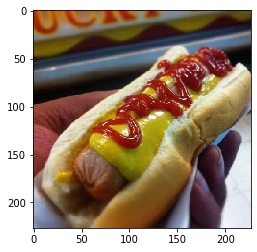

In [15]:
plt.imshow(hot_dog_images[10])

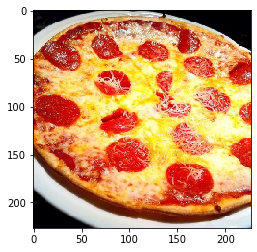

In [26]:
plt.imshow(pizza_images[25])